In [3]:
from openmmtools.constants import kB
from simtk import unit
import numpy as np
from rdkit.Chem import Draw
from rdkit import Chem
import copy
import os
from neutromeratio.utils import * 
import pickle
import mdtraj as md
import matplotlib.pyplot as plt
from pymbar import BAR

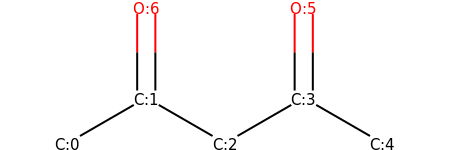

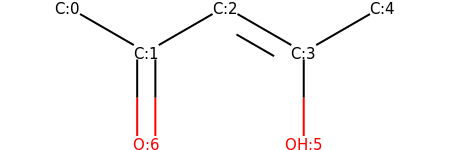

In [4]:
exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))

# specify the system you want to simulate
name = 'molDWRow_298'
#name = 'molDWRow_37'
#name = 'molDWRow_45'
#name = 'molDWRow_160'
#name = 'molDWRow_590'

# specify a run number
t1_smiles = exp_results[name]['t1-smiles']
t2_smiles = exp_results[name]['t2-smiles']

m1 = Chem.MolFromSmiles(t1_smiles)
AllChem.Compute2DCoords(m1)
display_mol(m1)
Draw.MolToFile(m1,f"../data/structures/{name}/{name}_1.svg")

m2 = Chem.MolFromSmiles(t2_smiles)
AllChem.Compute2DCoords(m2)
display_mol(m2)
Draw.MolToFile(m2,f"../data/structures/{name}/{name}_t2.svg")


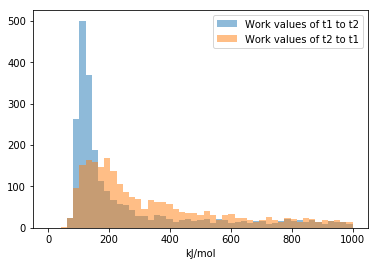

BAR estimate from 2500 work samples in each direction:
	DeltaF = 2.999 kcal/mol
	dDeltaF = 0.716kcal/mol


In [5]:
work_values_t1 = []
work_values_t2 = []
nr_of_mc_moves_t1 = 0
nr_of_mc_moves_t2 = 0

from_mol_tautomer_idx = 1
to_mol_tautomer_idx = 2
f = open(f"../data/md_mc_sampling/{name}/instantaenous_MC_{name}_from_t{from_mol_tautomer_idx}_to_t{to_mol_tautomer_idx}_work.csv", 'r')
for l in f:
    work_value = float(l.rstrip())
    work_values_t1.append(work_value)
    nr_of_mc_moves_t1+=1

    
from_mol_tautomer_idx = 2
to_mol_tautomer_idx = 1
f = open(f"../data/md_mc_sampling/{name}/instantaenous_MC_{name}_from_t{from_mol_tautomer_idx}_to_t{to_mol_tautomer_idx}_work.csv", 'r')
for l in f:
    work_value = float(l.rstrip())
    #energy_kJ_mol = (float(work_value)*kT).in_units_of(unit.kilojoule_per_mole)
    work_values_t2.append(work_value)
    nr_of_mc_moves_t2+=1
        
plt.hist(work_values_t1, np.linspace(0, 1000), label='Work values of t1 to t2', alpha=0.5)
plt.hist(work_values_t2, np.linspace(0, 1000),label='Work values of t2 to t1', alpha=0.5)
plt.xlabel('kJ/mol')
plt.legend()
plt.savefig(f"../data/md_mc_sampling//{name}/mc_work_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

e, stddev = BAR(np.asarray(work_values_t1), np.asarray(work_values_t2))
print('BAR estimate from {} work samples in each direction:\n\tDeltaF = {:.3f} kcal/mol\n\tdDeltaF = {:.3f}kcal/mol'.format(nr_of_mc_moves_t1, (e*kT).value_in_unit(unit.kilocalorie_per_mole), (stddev*kT).value_in_unit(unit.kilocalorie_per_mole)))


In [4]:
for std in [0.001, 0.01, 0.1, 0.15, 0.25]:
    for mod_bond_length in [0.8,0.9,0.95,1.0, 1.05, 1.1,1.2]:

        nr_of_mc_moves_t1 = 0
        nr_of_mc_moves_t2 = 0
        work_values_t1 = []
        work_values_t2 = []
        for run in range(1, nr_of_runs+1):
            f = open(f"../data/md_mc_sampling/{name}/{name}_from_t1_to_t2_run{run}_work_bond_length{mod_bond_length}_std{std}.csv", 'r')
            for l in f:
                ts, work_value = l.split(',')
                energy_kJ_mol = (float(work_value)*kT).in_units_of(unit.kilojoule_per_mole)
                work_values_t1.append(energy_kJ_mol._value)
                nr_of_mc_moves_t1+=1

            f = open(f"../data/md_mc_sampling/{name}/{name}_from_t2_to_t1_run{run}_work_bond_length{mod_bond_length}_std{std}.csv", 'r')
            for l in f:
                ts, work_value = l.split(',')
                energy_kJ_mol = (float(work_value)*kT).in_units_of(unit.kilojoule_per_mole)
                work_values_t2.append(energy_kJ_mol._value)
                nr_of_mc_moves_t2+=1

        plt.subplot(2, 1, 1)
        plt.hist(work_values_t1,  np.linspace(0, 1000), label=f"Work values of t1 to t2 - bond:{mod_bond_length:.3f} std:{std:.3f}", alpha=0.3)
        plt.subplot(2, 1, 2)
        plt.hist(work_values_t2, np.linspace(0, 1000), label=f"Work values of t2 to t1 - bond:{mod_bond_length:.3f} std:{std:.3f}", alpha=0.3)

    plt.subplot(2, 1, 1)
    plt.xlabel('kJ/mol')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.subplot(2, 1, 2)
    plt.xlabel('kJ/mol')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.savefig(f"../data/md_mc_sampling//{name}/mc_work_distribution_with_variable_bondlength_and_bond_stddev_{std:.3f}.png", dpi=300, bbox_inches='tight')
    plt.show()
        

#print('BAR estimate from {} work samples in each direction:\n\tDeltaF = {:.3f}\n\tdDeltaF = {:.3f}'.format(nr_of_mc_moves_t1, *BAR(np.asarray(work_values_t1), np.asarray(work_values_t2))))


NameError: name 'nr_of_runs' is not defined